# 主成分分析
- scikit-learnのPCAクラスを用いて主成分分析を実装しよう
- 寄与率を確認しながら、データの次元削減を行ってみよう


## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 標準化
from sklearn.preprocessing import StandardScaler
# 主成分分析（Principal Component Analysis; PCA）
from sklearn.decomposition import PCA 


## 2. 疑似データに対する分析

### 2-1. 疑似データの作成
- 生徒20人分の数学と物理のテスト結果

In [2]:
# データフレームの作成
df_test = pd.DataFrame({
    "math":[41,37,40,30,40,60,46,61,67,68,55,61,59,66,69,54,50,35,80,75],
    "physics":[26,32,31,24,60,40,26,27,33,25,26,30,29,37,41,36,31,29,36,34]
})

# 行番号をIDとして設定
df_test.index.name = "id"

# 点数の合計を表す列を追加
df_test["total"] = df_test["math"]  + df_test["physics"]
df_test.head()

,math,physics,total
id,,,
0,41,26,67
1,37,32,69
2,40,31,71
3,30,24,54
4,40,60,100


### 2-2. データの可視化

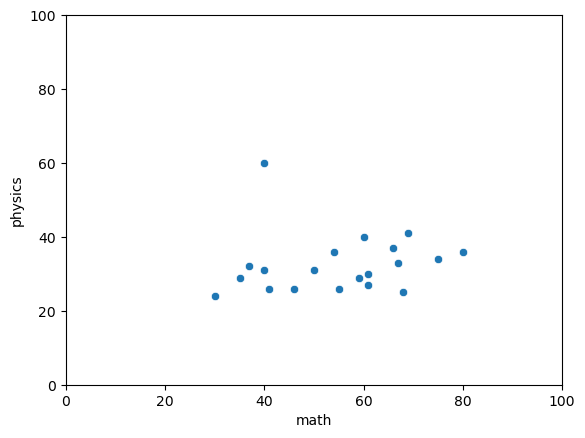

In [3]:
# 散布図の表示
sns.scatterplot(x='math', y='physics', data=df_test)

# 表示範囲の調整
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

- mathとphysicsの値には、正の相関が見られる
    - 数学のテスト結果があれば、物理のテスト結果を推測できる
    - 逆に、物理のテスト結果があれば、数学のテスト結果を推測できる
- この2つの変数を1つにまとめてしまっても元々の情報は損なわれない
- 2つの変数(2次元)を1つの変数(1次元)にまとめる(削減)するために、**主成分分析**を用いる

### 2-3. 主成分分析の実行
- [PCA()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)を用いて主成分分析を実行

In [4]:
# 変数を配列に変換
X = df_test[["math","physics"]].values

# 主成分分析用のオブジェクトを作成
# n_components: 削減後の次元数（主成分の数）
# 入力が2次元であるため、3以上に設定するとエラー
pca = PCA(n_components=2) 

# 主成分分析の実行
pca.fit(X) 

PCA(n_components=2)

### 2-4. 平均値と固有ベクトルの確認
- 元データの各次元における平均値
- 分散共分散行列の固有ベクトル

In [5]:
# 元データの平均値
print("X_mean:", pca.mean_, "\n")

# 分散共分散行列の固有ベクトル
# 元の変数に対する重み（主成分負荷量）
print("eigen vector:\n", 
      pca.components_, "\n")

# 固有ベクトルの大きさ
print("norm:",
      np.linalg.norm(pca.components_[0]).round(5), 
      np.linalg.norm(pca.components_[1]).round(5), "\n")

# 固有ベクトルの内積
print("dot product:", 
      np.dot(pca.components_[0], pca.components_[1]))

X_mean: [54.7  32.65] 

eigen vector:
 [[ 0.99634532  0.0854167 ]
 [-0.0854167   0.99634532]] 

norm: 1.0 1.0 

dot product: 0.0


### 2-5. 主成分軸の可視化
- 第1主成分(PC1)と第2主成分(PC2)は必ず直交する
- [quiver()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)でベクトルを矢印として表示
- 主成分軸を表すベクトルの始点は、元データの平均

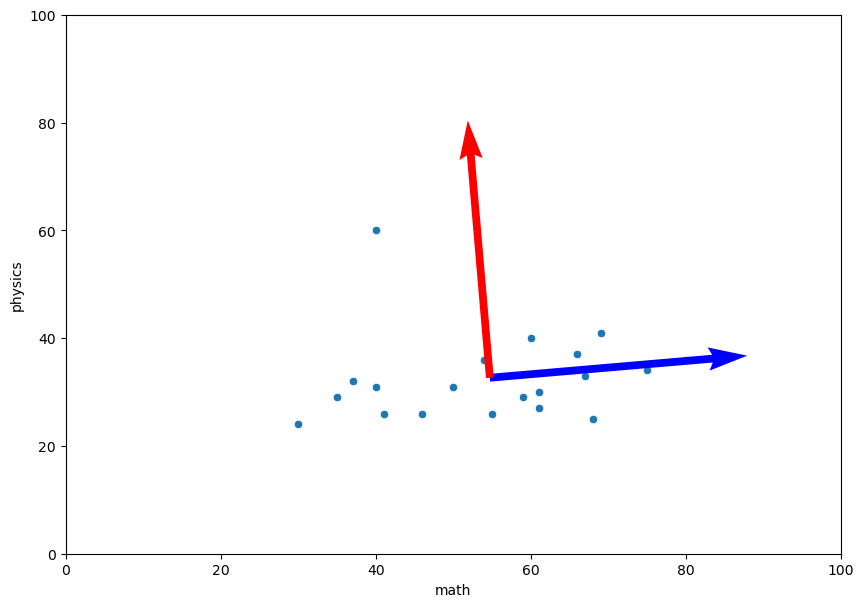

In [6]:
# 表示領域の作成
plt.figure(figsize=(10,7))
# 散布図の表示
sns.scatterplot(x=X[:,0], y=X[:,1])
# 表示範囲の調整
plt.xlim([0, 100])
plt.ylim([0, 100])
# 軸の設定
plt.xlabel('math')
plt.ylabel('physics')

# 主成分軸を表すベクトルを矢印として表示
# 第一主成分軸
plt.quiver(
    # 始点（元データの平均）
    pca.mean_[0], pca.mean_[1], 
    # ベクトルの方向と長さ（固有ベクトル）
    pca.components_[0,0], pca.components_[0,1], 
    # 色、太さ、長さ（表示領域の大きさに対して1/scale倍）
    color='b', width=0.01, scale=3 
)
# 第二主成分軸
plt.quiver(
    pca.mean_[0], pca.mean_[1], 
    pca.components_[1,0], pca.components_[1,1], 
    color='r', width=0.01, scale=3
)

plt.show()

### 2-6. 寄与率の確認
- 第一主成分で約76%説明できている
- 合計（全主成分の累積寄与率）は1になる

In [7]:
print("寄与率:",pca.explained_variance_ratio_)
print("累積寄与率:", pca.explained_variance_ratio_.sum())

寄与率: [0.75917911 0.24082089]
累積寄与率: 1.0


### 2-7. 主成分軸への射影変換
- 値を主成分得点に変換
- 元データから平均を引き、固有ベクトルとの行列積をとる

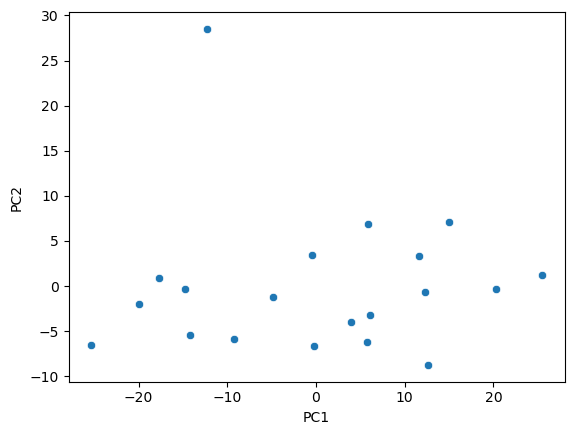

In [8]:
# 元データから平均を引き、固有ベクトルとの行列積をとる
# 固有ベクトルが、元の変数に対する重み（主成分負荷量）となる
Y = np.dot((X - pca.mean_), pca.components_.T)

# transform()でも同様の変換を行える
Y = pca.transform(X)

# 変換後の値（主成分得点）をデータフレームに格納
df_test["PC1"] = Y[:,0]
df_test["PC2"] = Y[:,1]

# 散布図の表示
sns.scatterplot(df_test, x="PC1", y="PC2")
plt.show()

In [9]:
# データフレームの中身を確認
df_test

,math,physics,total,PC1,PC2
id,,,,,
0,41,26,67,-14.217952,-5.455488
1,37,32,69,-17.690833,0.864251
2,40,31,71,-14.787214,-0.388344
3,30,24,54,-25.348584,-6.508594
4,40,60,100,-12.310129,28.505670
5,60,40,100,5.908443,6.870430
6,46,26,72,-9.236225,-5.882571
7,61,27,88,5.794371,-6.167476
8,67,33,100,12.284943,-0.701905


### [問]
- id=4, id=5, id=8の生徒は、合計得点が100点である
- 第一主成分で評価した場合は、どの生徒の得点が高いことになるだろうか？

## 3. 乳がんデータセットに対する分析
-  [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
    - 乳がんの診断を行う分類問題のデータセット
- 目的変数
    - Diagnosis：診断結果
        - M = malignant（悪性）
        - B = benign（良性）
- 説明変数
    - ある患者の細胞核の画像から算出された30個の実数値
    - 10個の特徴それぞれに関する3つの統計量（標準偏差、標準誤差、絶対値の最大値）
        - radius：中心から外周上の点に対する距離の平均
        - texture：グレースケール値の標準偏差
        - perimeter：外周
        - area：面積
        - smoothness：半径の局所的なばらつき
        - compactness：緊密さ$\frac{\mathrm{perimeter}^2}{\mathrm{area} - 1}$
        - concavity：輪郭の凹みの度合い
        - concave points：輪郭の凹部分の数
        - symmetry：対称性
        - fractal dimension：フラクタル次元("coastline approximation" - 1)
       

### 3-1. データの読み込み

In [10]:
# CSVファイルの読み込み
# 0列目をインデックスとして扱う
df_wdbc = pd.read_csv("../../1_data/ch14/wdbc.csv", index_col=[0])
# データサイズの確認
print(df_wdbc.shape)

# データの中身を確認
# 2列目以降が説明変数
display(df_wdbc.head())

# 説明変数のみを取り出す
X = df_wdbc.iloc[:,2:] 

(569, 32)


,ID,Diagnosis,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3-2. 平均値の確認

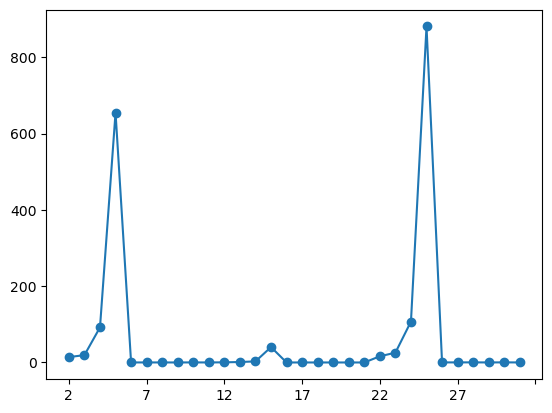

In [11]:
# 各説明変数の平均値をグラフ化
# マーカー付き折れ線グラフ
X.mean().plot(style='o-')
plt.show()

### 3-3. 主成分分析の実行

In [12]:
# 平均値の大きな変数が混じっているため、標準化しておく
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

# 主成分分析用のオブジェクトを作成
# n_components: 削減後の次元数（主成分の数）
# ここでは、元データの次元数に合わせる
pca = PCA(n_components=30) 

# 主成分分析の実行
pca.fit(X_std) 

PCA(n_components=30)

### 3-4. 固有ベクトルの確認

In [13]:
# 固有ベクトル
print("eigen vector:\n", pca.components_.round(3), "\n")

# 固有ベクトルの大きさ
print("norm:",)
for i in range(len(pca.components_)):
    # 改行なしで表示
    print(np.linalg.norm(pca.components_[i]).round(5), end=', ')
print("\n")

# 固有ベクトルの内積    
print("dot product:")
for i in range(len(pca.components_)):
    for r in range(len(pca.components_)):
        if i==r: # 同じベクトル同士の場合は省略
            continue
        # 改行なしで表示
        print(np.dot(pca.components_[i], pca.components_[r]).round(5), end=', ')

eigen vector:
 [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]
 [-0.009  0.065 -0.009  0.029 -0.104 -0.074  0.003 -0.026 -0.04  -0.023
   0.268  0.375  0.267  0.216  0.309  0.155  0.176  0.225  0.289  0.212
  -0.048 -0.042 -0.049 -0.012 -0.26  -0.236 -0.173 -0.17  -0.271 -0.233]
 [ 0.041 -0.603  0.042  0.053  0.159  0.032  0.019  0.065  0.067  0.049
   0.098 -0.36   0.089  0.108  0.045 -0.027  0.001  0.074  0.044  0.015
   0.015 -0.633  0.014  0.026  0.018 -0.091 -0.074  0.006 -0.036 -0.077]
 [ 0.038 -0.049  0.037  0.01  -0.365  0.012  0.086 -0.044 -0.306 -0.044
  -0.154 -0.192 -0.121 -0.128 -0.232  0.28   0

### 3-5. 寄与率の確認

In [14]:
# 何番目の主成分まで利用するか
max_component = 2

# 寄与率、累積寄与率を表示
print("寄与率＝",pca.explained_variance_ratio_[:max_component])
print(max_component, "つの主成分の累積寄与率＝", pca.explained_variance_ratio_[:max_component].sum())

寄与率＝ [0.44272026 0.18971182]
2 つの主成分の累積寄与率＝ 0.6324320765155942


### 3-6. 主成分軸への射影変換

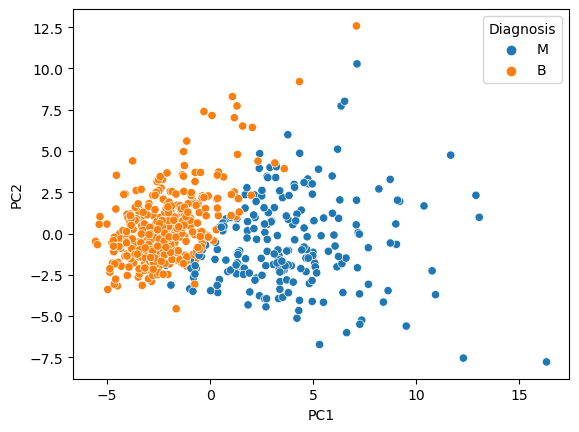

In [15]:
# 値を主成分得点に変換
Y = pca.transform(X_std)

# 変換後の値（主成分得点）をデータフレームに格納
df_wdbc["PC1"] = Y[:,0]
df_wdbc["PC2"] = Y[:,1]

# 散布図の表示（診断結果で色分け）
sns.scatterplot(
    df_wdbc, x="PC1", y="PC2", 
    hue="Diagnosis"
)
plt.show()